In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier, OutputCodeClassifier
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv (r'C:\Users\Andreas\Desktop\dissertationPipe\LeadPipes.csv')

In [3]:
cols = list(df.columns) 
cols

['StreetPostcode',
 'ReplacedPipes',
 'BuiltAfter1970',
 'Easting',
 'Northing',
 'WOAName',
 'Region',
 'CensusHouseholdCount2011',
 'UrbanRural',
 'Phosphorus',
 'LeadMeasurement',
 'BuildYear',
 'MeanHouseAge',
 'MedianHouseAge',
 'BuildYearRounded',
 'LeadPresence',
 'TotalPoints',
 'LeadProportion']

In [4]:
# check for na
df.isnull().any()

StreetPostcode              False
ReplacedPipes               False
BuiltAfter1970              False
Easting                     False
Northing                    False
WOAName                     False
Region                      False
CensusHouseholdCount2011    False
UrbanRural                  False
Phosphorus                  False
LeadMeasurement             False
BuildYear                   False
MeanHouseAge                False
MedianHouseAge              False
BuildYearRounded            False
LeadPresence                False
TotalPoints                 False
LeadProportion              False
dtype: bool

# Exploratory Data Analysis

In [5]:
# ReplacedPipes
df['ReplacedPipes'].value_counts()

0    274
1     34
Name: ReplacedPipes, dtype: int64

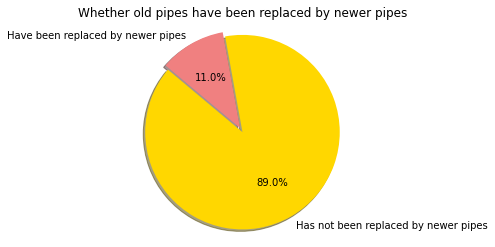

In [8]:
labels = 'Has not been replaced by newer pipes', 'Have been replaced by newer pipes'
sizes = [274, 34]
colors = ['gold',  'lightcoral']
explode = (0, 0.05)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Whether old pipes have been replaced by newer pipes',size = 12)
plt.axis('equal')
plt.show()

In [9]:
# BuiltAfter1970
df['BuiltAfter1970'].value_counts()
df.loc[df['BuiltAfter1970'] >= 0.5 ]['BuiltAfter1970'].count()

147

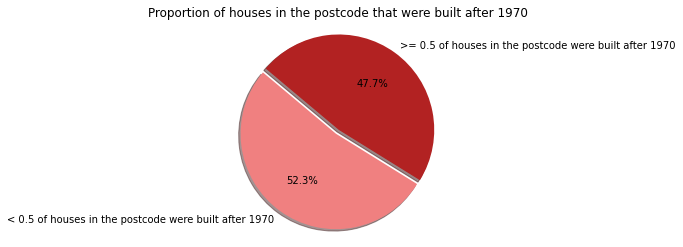

In [11]:
# Proportion of houses in the postcode that were built after 1970
labels = '< 0.5 of houses in the postcode were built after 1970', '>= 0.5 of houses in the postcode were built after 1970'
sizes = [161, 147]
colors = ['lightcoral','firebrick']
explode = (0, 0.05)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of houses in the postcode that were built after 1970',size = 12)

plt.axis('equal')
plt.show()

In [12]:
# Transformation of Easting & Northing to longitude and latitude

In [13]:
import sys
!{sys.executable} -m pip install folium

In [14]:
pip install convertbng

Note: you may need to restart the kernel to use updated packages.


In [15]:
from convertbng.util import convert_bng, convert_lonlat
res = convert_lonlat(df['Easting'],df['Northing'])
lat = res[1]
lon = res[0]
df['lati'] = lat
df['lont'] = lon

## map with all the cases

In [16]:
import folium
#tiles='Stamen Terrain'
m1 = folium.Map(
    location=[57.86217541,-2.50073013],
    zoom_start=6.4)
for i in range(len(lat)):
    folium.CircleMarker(
    location=[lat[i],lon[i]],
    weight = 1,
    radius=1.5,
    color='red',
    fill=True,
    fill_color='red'
    ).add_to(m1)
m1

## heatmap

In [17]:
from folium import plugins
import folium

In [18]:
h = folium.Map(
    location=[57.86217541,-2.50073013],
    zoom_start=6.4)
for i in range(len(lat)):
    folium.CircleMarker(
    location=[lat[i],lon[i]],
    weight = 1,
    radius=1.4,
    color='red',
    fill=True
    ).add_to(h)
hea1 = df.loc[df['LeadMeasurement'] >= 1 ]['Easting']
hea2 = df.loc[df['LeadMeasurement'] >= 1 ]['Northing']
hea3 = convert_lonlat(hea1,hea2)
lathea = hea3[1]
lonhea = hea3[0]
stationArr = np.column_stack((lathea, lonhea))
# plot heatmap
h.add_children(plugins.HeatMap(stationArr, radius=15))
h

C:\Users\Andreas\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.


## map with LeadProportion

In [19]:
c1la = df.loc[df['LeadProportion'] <= 0.25 ]['lati']
c1lon = df.loc[df['LeadProportion'] <= 0.25 ]['lont']
c2la = df.loc[(df['LeadProportion'] >0.25) & (df['LeadProportion']<=0.5)]['lati']
c2lon = df.loc[(df['LeadProportion'] >0.25) & (df['LeadProportion']<=0.5)]['lont']
c3la = df.loc[(df['LeadProportion'] >0.5) & (df['LeadProportion']<=0.75)]['lati']
c3lon = df.loc[(df['LeadProportion'] >0.5) & (df['LeadProportion']<=0.75)]['lont']
c4la = df.loc[(df['LeadProportion'] >0.75) & (df['LeadProportion']<=1)]['lati']
c4lon = df.loc[(df['LeadProportion'] >0.75) & (df['LeadProportion']<=1)]['lont']

In [20]:
c1la.reset_index(drop=True, inplace=True)
c1lon.reset_index(drop=True, inplace=True)
c2la.reset_index(drop=True, inplace=True)
c2lon.reset_index(drop=True, inplace=True)
c3la.reset_index(drop=True, inplace=True)
c3lon.reset_index(drop=True, inplace=True)
c4la.reset_index(drop=True, inplace=True)
c4lon.reset_index(drop=True, inplace=True)

In [21]:
pro = folium.Map(
    location=[57.86217541,-2.50073013],
    zoom_start=6.45)
for i in range(len(c1la)):
    folium.CircleMarker(
    location=[c1la[i],c1lon[i]],
    weight = 2.8,
    radius=1.4,
    color='darkgreen',
    fill=True,
    fill_color="darkgreen"
    ).add_to(pro)
for i in range(len(c2la)):
    folium.CircleMarker(
    location=[c2la[i],c2lon[i]],
    weight = 2.8,
    radius=1.4,
    color='maroon',
    fill=True,
    fill_color="maroon"
    ).add_to(pro)
for i in range(len(c3la)):
    folium.CircleMarker(
    location=[c3la[i],c3lon[i]],
    weight = 2.9,
    radius=1.5,
    color='yellow',
    fill=True,
    fill_color="yellow"
    ).add_to(pro)
for i in range(len(c4la)):
    folium.CircleMarker(
    location=[c4la[i],c4lon[i]],
    weight = 2.8,
    radius=1.4,
    color='red',
    fill=True,
    fill_color="red"
    ).add_to(pro)
pro

In [22]:
# Number of households in each street postcode based on Scottish 2011 census

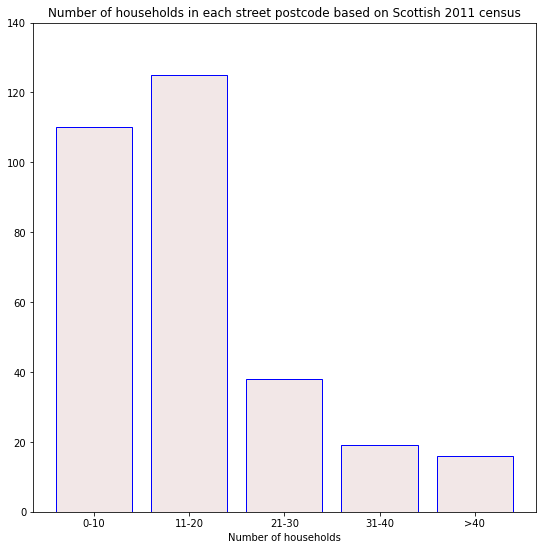

In [23]:
plt.rcParams["figure.figsize"] = (9,9)
height = [110,125,38,19,16]
bars = ('0-10', '11-20', '21-30', '31-40', '>40')
y_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(y_pos, height, color=(0.50, 0.1, 0.1, 0.1),  edgecolor='blue')
 
# Add title and axis names
plt.title('Number of households in each street postcode based on Scottish 2011 census')
plt.xlabel('Number of households')
plt.ylabel('')
 
# Limits for the Y axis
plt.ylim(0,140)
 
# Create names
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

In [24]:
# Number of postcodes in each category of UrbanRural

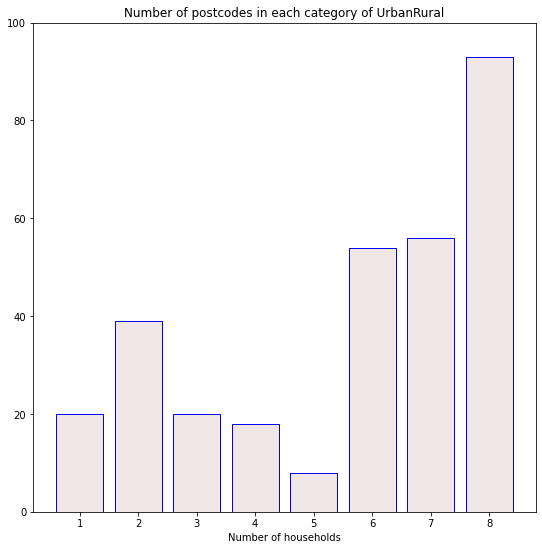

In [25]:
plt.rcParams["figure.figsize"] = (9,9)
height = [20,39,20,18,8,54,56,93]
bars = ('1', '2', '3', '4', '5','6', '7', '8')
y_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(y_pos, height, color=(0.50, 0.1, 0.1, 0.1),  edgecolor='blue')
 
# Add title and axis names
plt.title('Number of postcodes in each category of UrbanRural')
plt.xlabel('Number of households')
plt.ylabel('')
 
# Limits for the Y axis
plt.ylim(0,100)
 
# Create names
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

In [26]:
# correlation matrix

In [27]:
categ = ['Region']
df = pd.get_dummies(df, prefix_sep='_',columns = categ)
df2 = df[['LeadMeasurement','Region_AYR','Region_DON','Region_FORTH','Region_NITH','Region_TAY','Region_TWEED',
 'UrbanRural',
 'ReplacedPipes',
 'BuiltAfter1970',
 'CensusHouseholdCount2011',
 'Phosphorus',
 'BuildYear',
 'MeanHouseAge',
 'MedianHouseAge',
 'BuildYearRounded',
 'LeadPresence',
 'TotalPoints',
 'LeadProportion']]

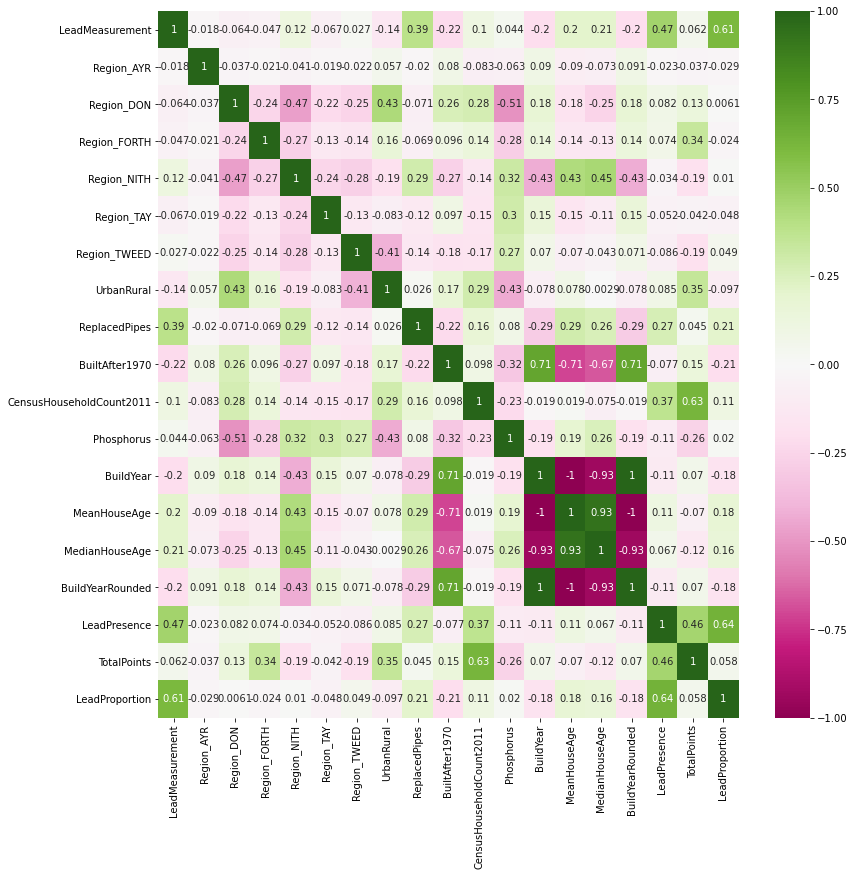

In [28]:
# correlation
from matplotlib.pyplot import figure
figure(figsize=(13,13))
corrMatrix = df2.corr()
sn.heatmap(corrMatrix, annot=True,cmap="PiYG")
plt.show()

In [29]:
# replaces pipes & BuildYear
df.loc[df['BuildYear'] < 1970 ]['ReplacedPipes'].value_counts()

0    174
1     33
Name: ReplacedPipes, dtype: int64

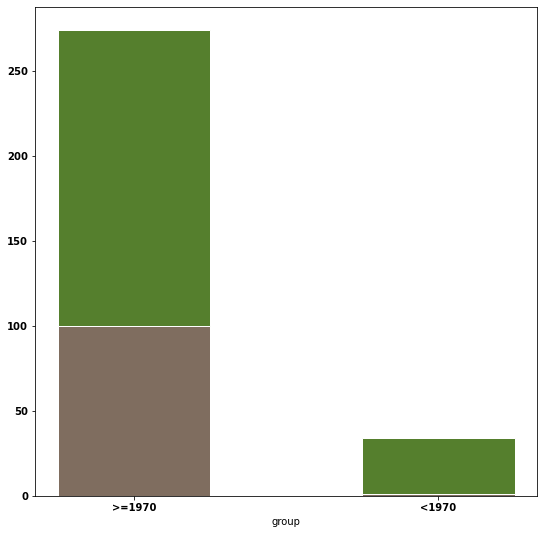

In [30]:
# replaces pipes & BuildYear

from matplotlib import rc

# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [100,1]
bars2 = [174,33]

# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1]
 
# Names of group and bar width
names = ['>=1970','<1970']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)

 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
 
# Show graphic
plt.show()

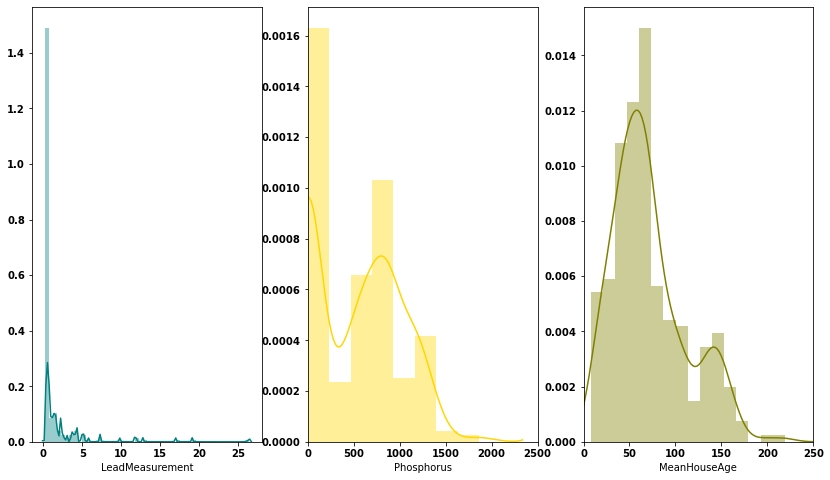

In [31]:
# leadmeasurement,MeanHouseAge and phosporus
import seaborn as sns
# plot
f, axes = plt.subplots(1, 3, figsize=(14, 8), sharex=False)
axes[1].set_xlim(0,2500)
axes[2].set_xlim(0,250)
sns.distplot( df["LeadMeasurement"] , color="teal", ax=axes[0])
sns.distplot( df["Phosphorus"] , color="gold", ax=axes[1])
sns.distplot( df["MeanHouseAge"] , color="olive", ax=axes[2])

In [32]:
# Urban rural mean of lead

In [33]:
import statistics 
u1 = statistics.mean(df.loc[df['UrbanRural'] == 1]['LeadMeasurement'])
u2 = statistics.mean(df.loc[df['UrbanRural'] == 2]['LeadMeasurement'])
u3 = statistics.mean(df.loc[df['UrbanRural'] == 3]['LeadMeasurement'])
u4 = statistics.mean(df.loc[df['UrbanRural'] == 4]['LeadMeasurement'])
u5 = statistics.mean(df.loc[df['UrbanRural'] == 5]['LeadMeasurement'])
u6 = statistics.mean(df.loc[df['UrbanRural'] == 6]['LeadMeasurement'])
u7 = statistics.mean(df.loc[df['UrbanRural'] == 7]['LeadMeasurement'])
u8 = statistics.mean(df.loc[df['UrbanRural'] == 8]['LeadMeasurement'])

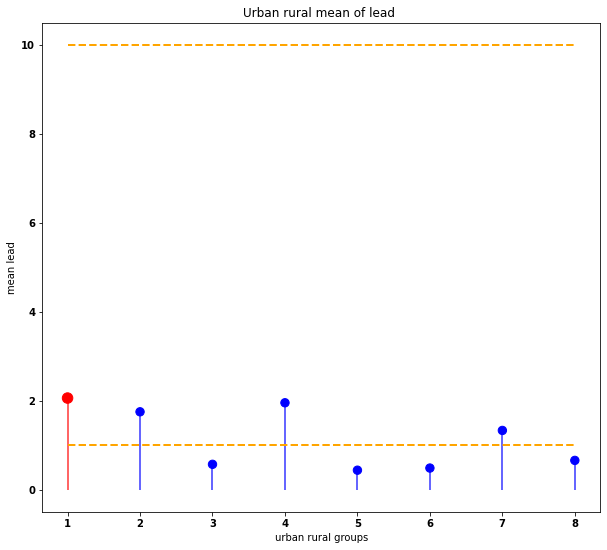

In [34]:
figure(figsize=(10,9))
# Create a dataframe
umean = pd.DataFrame({'group':[1,2,3,4,5,6,7,8], 'values':[u1,u2,u3,u4,u5,u6,u7,u8]})
 
# Reorder it following the values:

my_range=range(1,len(umean.index)+1)
 
# Create a color if the group is "B"
my_color=np.where(umean ['group']==1, 'red', 'blue')
my_size=np.where(umean ['group']==1, 110, 70)
 
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.vlines(x=umean['group'], ymin=0, ymax=umean['values'], color=my_color, alpha=1.8)
plt.scatter(umean['group'], umean['values'], color=my_color, s=my_size, alpha=1)

plt.plot([1, 8], [1, 1], '--', lw=2, color='orange')
plt.plot([1, 8], [10, 10], '--', lw=2, color='orange')
plt.title('Urban rural mean of lead ')
plt.xlabel('urban rural groups')
plt.ylabel('mean lead') ;

In [38]:
# Phosphorus and Urban or Rural boxplot

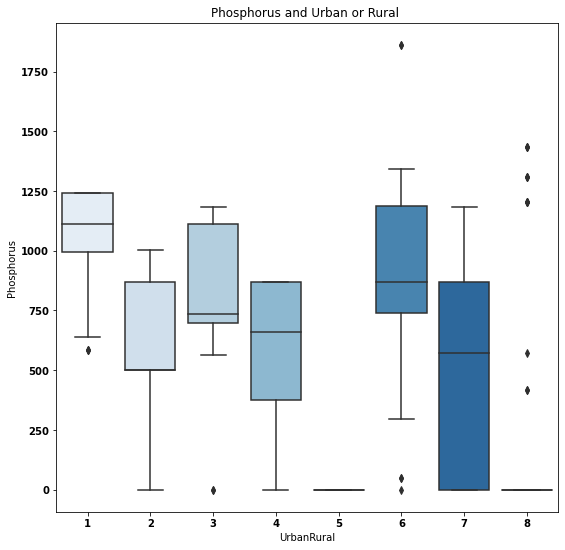

In [39]:
sns.boxplot( x=df["UrbanRural"], y=df["Phosphorus"],palette="Blues")
plt.title('Phosphorus and Urban or Rural ');

In [40]:
# mean LeadMeasurement & years 

In [41]:
b1 = statistics.mean(df.loc[df['BuildYearRounded'] <=1880]['LeadMeasurement'])
b2 = statistics.mean(df.loc[(df['BuildYearRounded'] >1880) & (df['BuildYearRounded']<=1915)]['LeadMeasurement']) 
b3 = statistics.mean(df.loc[(df['BuildYearRounded'] >1915) & (df['BuildYearRounded']<=1940)]['LeadMeasurement'])
b4 = statistics.mean(df.loc[(df['BuildYearRounded'] >1940) & (df['BuildYearRounded']<=1950)]['LeadMeasurement'])
b5 = statistics.mean(df.loc[(df['BuildYearRounded'] >1950) & (df['BuildYearRounded']<=1955)]['LeadMeasurement'])
b6 = statistics.mean(df.loc[(df['BuildYearRounded'] >1955) & (df['BuildYearRounded']<=1965)]['LeadMeasurement'])
b7 = statistics.mean(df.loc[(df['BuildYearRounded'] >1965) & (df['BuildYearRounded']<=1972)]['LeadMeasurement'])
b8 = statistics.mean(df.loc[(df['BuildYearRounded'] >1972) & (df['BuildYearRounded']<=1980)]['LeadMeasurement'])
b9 = statistics.mean(df.loc[(df['BuildYearRounded'] >1980) & (df['BuildYearRounded']<=1995)]['LeadMeasurement'])
b10 = statistics.mean(df.loc[df['BuildYearRounded'] >1995]['LeadMeasurement'])

C:\Users\Andreas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  """


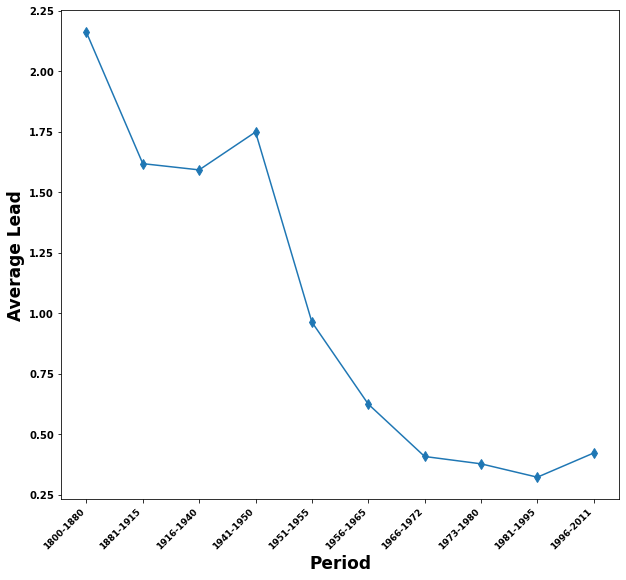

In [42]:
yr=pd.DataFrame({'x': ['1800-1880','1881-1915','1916-1940','1941-1950','1951-1955','1956-1965','1966-1972','1973-1980','1981-1995','1996-2011'], 'y': [b1,b2,b3,b4,b5,b6,b7,b8,b9,b10] })
figure(figsize=(10,9))
# plot
bars = ['1800-1880','1881-1915','1916-1940','1941-1950','1951-1955','1956-1965','1966-1972','1973-1980','1981-1995','1996-2011']
plt.plot( 'x', 'y', data=yr, linestyle='-', marker="d",markersize=7)
plt.xlabel('Period', fontweight='bold', fontsize='17', horizontalalignment='center')
plt.xticks(bars, rotation=45, fontweight='bold', fontsize='9', horizontalalignment='right')
plt.ylabel('Average Lead',fontweight='bold', fontsize='17', horizontalalignment='center')
plt.show();


# Methods & Models

In [43]:
df = pd.read_csv (r'C:\Users\Andreas\Desktop\dissertationPipe\LeadPipes.csv')

In [44]:
c = df['LeadMeasurement']
df['binary'] = c
df['binary'].values[df['binary'].values >= 1] = 1
df['binary'].values[df['binary'].values < 1] = 0
categ = ['Region', 'UrbanRural','WOAName']
df = pd.get_dummies(df, prefix_sep='_',columns = categ)

In [45]:
X = df[['ReplacedPipes','CensusHouseholdCount2011','Phosphorus','MeanHouseAge',
 'Region_AYR','Region_DON','Region_FORTH','Region_NITH','Region_TAY','Region_TWEED',
 'UrbanRural_1','UrbanRural_2','UrbanRural_3','UrbanRural_4','UrbanRural_5','UrbanRural_6', 'UrbanRural_7','UrbanRural_8',
 'WOAName_Afton South Region WOA', 'WOAName_Ardeonaig WOA',
 'WOAName_Ardfern WOA','WOAName_Arinagour WOA',
 'WOAName_Auchneel WOA','WOAName_Balmore South Region Tweed WOA',
 'WOAName_Balmore West Region WOA', 'WOAName_Balquidder WOA',
 'WOAName_Black Esk & Winterhope WOA', 'WOAName_Black Esk WOA', 'WOAName_Blairlinnans WOA',
 'WOAName_Blairnamarrow WOA', 'WOAName_Boardhouse WOA', 'WOAName_Bonnycraig (Peebles) WOA',
 "WOAName_Brig o' Turk WOA", 'WOAName_C V & Turret & Balmore WOA',
 'WOAName_Cargen Borehole WOA',
 'WOAName_Carron Valley WOA', 'WOAName_Carsphairn WOA',
 'WOAName_Castle Moffat WOA', 'WOAName_Cladich WOA',
 'WOAName_Clatto WOA', 'WOAName_Colonsay WOA',
 'WOAName_Corrie Membrane WOA', 'WOAName_Crianlarich WOA',
 'WOAName_Daer & Coulter WOA', 'WOAName_Dalmally WOA',
 'WOAName_Eday WOA',
 'WOAName_Eela Water WOA', 'WOAName_Fetlar WOA',
 'WOAName_Forehill WOA', 'WOAName_Foula WOA',
 'WOAName_Gigha WOA', 'WOAName_Glencorse WOA', 'WOAName_Glenfarg WOA',
 'WOAName_Glengap & Ringford WOA',
 'WOAName_Glengap WOA', 'WOAName_Glenlatterach WOA',
 'WOAName_Hopes WOA',
 'WOAName_Inver-Mann-Turriff WOA', 'WOAName_Invercannie WOA', 'WOAName_Kenmore WOA',
 'WOAName_Kettleton WOA', 'WOAName_Killiecrankie WOA',
 'WOAName_Killin WOA',
 'WOAName_Killylour & Terregles WOA',
 'WOAName_Killylour WOA', 'WOAName_Kilmelford WOA',
 'WOAName_Kinloch Rannoch WOA', 'WOAName_Kirbister & Boardhouse WOA',
 'WOAName_Kirkmichael WOA',
 'WOAName_LF & Terregles & Killylour WOA', 'WOAName_Lintrathen WOA',
 'WOAName_Lismore Primary WOA', 'WOAName_Lochearnhead WOA',
 'WOAName_Lochgoilhead WOA',
 'WOAName_Lochinvar WOA', 'WOAName_Marchbank WOA', 'WOAName_Moffat WOA',
 'WOAName_North Hoy WOA', 'WOAName_North Ronaldsay WOA',
 'WOAName_Pateshill WOA', 'WOAName_Penwhirn WOA',
 'WOAName_Perth (Gowans Terrace) WOA', 'WOAName_Rawburn WOA',
 'WOAName_Rosebery (Ed & Lothian) WOA',
 'WOAName_Rousay School WOA', 'WOAName_Sanday WOA', 'WOAName_Sandy Loch WOA', 'WOAName_South Hoy WOA',
 'WOAName_Spey Badentinan WOA', 'WOAName_Strathyre WOA',
 'WOAName_Stronsay WOA', 'WOAName_Taynuilt WOA',
 'WOAName_Tiree WOA', 'WOAName_Tobermory WOA', 'WOAName_Turret East Region WOA',
 'WOAName_Turret West Region WOA', 'WOAName_Tyndrum WOA', 'WOAName_Unst WOA', 'WOAName_Westray WOA','WOAName_Whitehillocks WOA', 'WOAName_Yell WOA']]
y = pd.to_numeric(df['binary'],downcast='float')

In [46]:
df["binary"].value_counts()

0.0    249
1.0     59
Name: binary, dtype: int64

## oversampling 

### smotenc

In [47]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(sampling_strategy = 'all',categorical_features=[0, *range(4,100,1)], random_state=1)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=1)

## Logistic Regression

In [49]:
clf = LogisticRegression(multi_class='ovr', solver = 'liblinear', max_iter=100,class_weight="balanced")
clf.fit(x_train, y_train)
preds = clf.predict(x_test)
print(confusion_matrix(y_test, preds))
print("Train score: ", roc_auc_score(y_train, clf.predict(x_train), sample_weight=None))
print("Test score: " ,  roc_auc_score(y_test, preds, sample_weight=None))
scores = cross_validate(clf, x_train,y_train, cv=5, scoring='roc_auc')
print("Cross validation score: ",scores["test_score"].mean())

[[55 19]
 [ 9 82]]
Train score:  0.8418083182640145
Test score:  0.8221710721710721
Cross validation score:  0.8157546082949307


## xgboost

In [50]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional scklearn functions

clf = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
clf.fit(x_train, y_train)
preds = clf.predict(x_test)
print(confusion_matrix(y_test, preds))
print("Train score: ", roc_auc_score(y_train, clf.predict(x_train), sample_weight=None))
print("Test score: " ,  roc_auc_score(y_test, preds, sample_weight=None))
scores = cross_validate(clf, x_train,y_train, cv=5, scoring='roc_auc')
print("Cross validation score: ",scores["test_score"].mean())

[[54 20]
 [19 72]]
Train score:  1.0
Test score:  0.7604692604692603
Cross validation score:  0.8281566820276497


## Naive Bayes

In [51]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

In [52]:
# Gaussian
clf = GaussianNB()
clf.fit(x_train, y_train)
preds = clf.predict(x_test)
print(confusion_matrix(y_test, preds))
print("Train score: ", roc_auc_score(y_train, clf.predict(x_train), sample_weight=None))
print("Test score: " ,  roc_auc_score(y_test, preds, sample_weight=None))
scores = cross_validate(clf, x_train,y_train, cv=5, scoring='roc_auc')
print("Cross validation score: ",scores["test_score"].mean())

[[26 48]
 [ 5 86]]
Train score:  0.7911211573236889
Test score:  0.6482031482031482
Cross validation score:  0.7063421658986175


In [53]:
# Bernoulli
clf = BernoulliNB()
clf.fit(x_train, y_train)
preds = clf.predict(x_test)
print(confusion_matrix(y_test, preds))
print("Train score: ", roc_auc_score(y_train, clf.predict(x_train), sample_weight=None))
print("Test score: " ,  roc_auc_score(y_test, preds, sample_weight=None))
scores = cross_validate(clf, x_train,y_train, cv=5, scoring='roc_auc')
print("Cross validation score: ",scores["test_score"].mean())

[[50 24]
 [14 77]]
Train score:  0.786998191681736
Test score:  0.760914760914761
Cross validation score:  0.6880904377880184


In [54]:
# Multinomial
clf = MultinomialNB()
clf.fit(x_train, y_train)
preds = clf.predict(x_test)
print(confusion_matrix(y_test, preds))
print("Train score: ", roc_auc_score(y_train, clf.predict(x_train), sample_weight=None))
print("Test score: " ,  roc_auc_score(y_test, preds, sample_weight=None))
scores = cross_validate(clf, x_train,y_train, cv=5, scoring='roc_auc')
print("Cross validation score: ",scores["test_score"].mean())

[[30 44]
 [38 53]]
Train score:  0.5777757685352622
Test score:  0.4939114939114939
Cross validation score:  0.5917281105990784


## SGDClassifier

In [55]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(x_train, y_train)
preds = clf.predict(x_test)
print(confusion_matrix(y_test, preds))
print("Train score: ", roc_auc_score(y_train, clf.predict(x_train), sample_weight=None))
print("Test score: " ,  roc_auc_score(y_test, preds, sample_weight=None))
scores = cross_validate(clf, x_train,y_train, cv=5, scoring='roc_auc')
print("Cross validation score: ",scores["test_score"].mean())

[[50 24]
 [ 7 84]]
Train score:  0.8953887884267631
Test score:  0.7993762993762994
Cross validation score:  0.7777822580645162


## SVM

In [56]:
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train, y_train)
preds = clf.predict(x_test)
print(confusion_matrix(y_test, preds))
print("Train score: ", roc_auc_score(y_train, clf.predict(x_train), sample_weight=None))
print("Test score: " ,  roc_auc_score(y_test, preds, sample_weight=None))
scores = cross_validate(clf, x_train,y_train, cv=5, scoring='roc_auc')
print("Cross validation score: ",scores["test_score"].mean())

[[54 20]
 [ 6 85]]
Train score:  0.8697649186256782
Test score:  0.831897831897832
Cross validation score:  0.8305011520737328


## Random Forest

In [57]:
clf = RandomForestClassifier(random_state=1)
clf.fit(x_train, y_train)
preds = clf.predict(x_test)
print(confusion_matrix(y_test, preds))
print("Train score: ", roc_auc_score(y_train, clf.predict(x_train), sample_weight=None))
print("Test score: " ,  roc_auc_score(y_test, preds, sample_weight=None))
scores = cross_validate(clf, x_train,y_train, cv=5, scoring='roc_auc')
print("Cross validation score: ",scores["test_score"].mean())

[[60 14]
 [10 81]]
Train score:  1.0
Test score:  0.8504603504603504
Cross validation score:  0.8635714285714284


# Random Forest

## Tuning - RandomizedSearchCV - GridSearchCV

In [58]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [50,100,150,200]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [59]:
rf = RandomForestClassifier(random_state=1)
# Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1,scoring='roc_auc')
# Fit the random search model
rf_random.fit(x_train, y_train)

C:\Users\Andreas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:   16.3s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=1, scoring='roc_auc', verbose=2)

In [60]:
rf_random.best_params_

{'n_estimators': 150,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [61]:
clf = RandomForestClassifier(n_estimators=150,min_samples_split = 2, max_depth=20,max_features='sqrt',min_samples_leaf=1,bootstrap= True,random_state=1)
clf.fit(x_train, y_train)
preds = clf.predict(x_test)
print(confusion_matrix(y_test, preds))
print("Train score: ", roc_auc_score(y_train, clf.predict(x_train), sample_weight=None))
print("Test score: " ,  roc_auc_score(y_test, preds, sample_weight=None))
scores = cross_validate(clf, x_test,y_test, cv=5, scoring='roc_auc')
print("Cross validation score: ",scores["test_score"].mean())

[[59 15]
 [11 80]]
Train score:  1.0
Test score:  0.8382090882090882
Cross validation score:  0.8681648565859093


In [62]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    "max_depth" : [15,20,25],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [130,150,160]
}
# Create a based model
rf = RandomForestClassifier(random_state=1)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='roc_auc',
                          cv = 3, n_jobs = -1, verbose = 2)

In [63]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.3s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [15, 20, 25],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [2],
                         'n_estimators': [130, 150, 160]},
             scoring='roc_auc', verbose=2)

In [64]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [65]:
clf = RandomForestClassifier(n_estimators=150, min_samples_split = 2,max_depth=20, max_features='sqrt',min_samples_leaf=1,bootstrap= True,random_state=1)
clf.fit(x_train, y_train)
preds = clf.predict(x_test)
print(confusion_matrix(y_test, preds))
print("Train score: ", roc_auc_score(y_train, clf.predict(x_train), sample_weight=None))
print("Test score: " ,  roc_auc_score(y_test, preds, sample_weight=None))
scores = cross_validate(clf, x_test,y_test, cv=5, scoring='roc_auc')
print("Cross validation score: ",scores["test_score"].mean())

[[59 15]
 [11 80]]
Train score:  1.0
Test score:  0.8382090882090882
Cross validation score:  0.8681648565859093


In [66]:
param_grid = {
    'bootstrap': [True],
    "max_depth" : [18,20],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [140,150,145]
}
# Create a based model
rf = RandomForestClassifier(random_state=1)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='roc_auc',
                          cv = 3, n_jobs = -1, verbose = 2)

In [67]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.9s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [18, 20],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [2],
                         'n_estimators': [140, 150, 145]},
             scoring='roc_auc', verbose=2)

In [68]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [69]:
clf = RandomForestClassifier(n_estimators=150, min_samples_split = 2, max_depth=20, max_features='sqrt',min_samples_leaf=1,bootstrap= True,random_state=1)

## Map of predictions

In [70]:
from convertbng.util import convert_bng, convert_lonlat
res = convert_lonlat(df['Easting'],df['Northing'])
lat = res[1]
lon = res[0]
df['lati'] = lat
df['lont'] = lon

In [71]:
import folium
#tiles='Stamen Terrain'
m1 = folium.Map(
    location=[57.86217541,-2.50073013],
    zoom_start=6.4)
for i in range(len(lat)):
    folium.CircleMarker(
    location=[lat[i],lon[i]],
    weight = 1,
    radius=1.4,
    color='red',
    fill=True
    ).add_to(m1)


In [72]:
latpr =[]
lonpre =[]
k = 0
for i in range(len(preds)):
    if preds[i] == 1:
        latpr.append(lat[k])
        lonpre.append(lon[k])
    k =k+1

In [73]:
stationArr = np.column_stack((latpr,lonpre))
# plot heatmap
m1.add_children(plugins.HeatMap(stationArr, radius=15))
m1

C:\Users\Andreas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


## Calibration

In [74]:
from sklearn.calibration import calibration_curve
from matplotlib import pyplot
from sklearn.calibration import CalibratedClassifierCV

In [75]:
clf = RandomForestClassifier(n_estimators=150, min_samples_split = 2, max_depth=20, max_features='sqrt',min_samples_leaf=1,bootstrap= True,random_state=1)
clf.fit(x_train, y_train)


RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=150,
                       random_state=1)

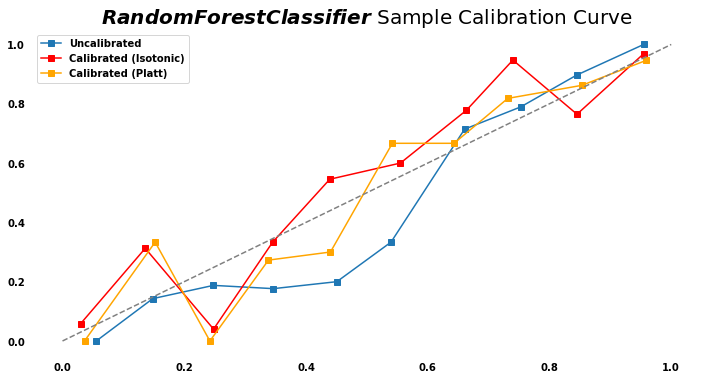

In [76]:
fig, ax = plt.subplots(1, figsize=(12, 6))

# Uncalibrated

clf.fit(x_train, y_train)
y_test_predict_proba = clf.predict_proba(x_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)

plt.plot(mean_predicted_value, fraction_of_positives, 's-', label='Uncalibrated')

# Calibrated
clf_sigmoid = CalibratedClassifierCV(clf, cv=3, method='isotonic')
clf_sigmoid.fit(x_train, y_train)
y_test_predict_proba = clf_sigmoid.predict_proba(x_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10, normalize=True)

plt.plot(mean_predicted_value, fraction_of_positives, 's-', color='red', label='Calibrated (Isotonic)')

# Calibrated, Platt
clf_sigmoid = CalibratedClassifierCV(clf, cv=3, method='sigmoid')
clf_sigmoid.fit(x_train, y_train)
y_test_predict_proba = clf_sigmoid.predict_proba(x_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10, normalize=True)
plt.plot(mean_predicted_value, fraction_of_positives, 's-', color='orange', label='Calibrated (Platt)')
plt.plot([0, 1], [0, 1], '--', color='gray')

sns.despine(left=True, bottom=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.gca().legend()
plt.title("$RandomForestClassifier$ Sample Calibration Curve", fontsize=20); pass

## Brier score

In [77]:
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score, log_loss)
sample_weight = np.random.RandomState(1).rand(y_resampled.shape[0])

# split train, test for calibration
X_train, X_test, y_train, y_test, sw_train, sw_test = \
    train_test_split(X_resampled, y_resampled, sample_weight, test_size=0.33, random_state=1)

In [78]:
clf.fit(X_train, y_train)  
prob_pos_clf = clf.predict_proba(X_test)[:, 1]

# RANDOM FOREST with isotonic calibration
clf_isotonic = CalibratedClassifierCV(clf, cv=3, method='isotonic')
clf_isotonic.fit(X_train, y_train, sw_train)
prob_pos_isotonic = clf_isotonic.predict_proba(X_test)[:, 1]

# RANDOM FOREST with sigmoid calibration
clf_sigmoid = CalibratedClassifierCV(clf, cv=3, method='sigmoid')
clf_sigmoid.fit(X_train, y_train, sw_train)
prob_pos_sigmoid = clf_sigmoid.predict_proba(X_test)[:, 1]

print("Brier scores: (the smaller the better)")

clf_score = brier_score_loss(y_test, prob_pos_clf, sw_test)
print("No calibration: %1.3f" % clf_score)

clf_isotonic_score = brier_score_loss(y_test, prob_pos_isotonic, sw_test)
print("With isotonic calibration: %1.3f" % clf_isotonic_score)

clf_sigmoid_score = brier_score_loss(y_test, prob_pos_sigmoid, sw_test)
print("With sigmoid calibration: %1.3f" % clf_sigmoid_score)

Brier scores: (the smaller the better)
No calibration: 0.123
With isotonic calibration: 0.123
With sigmoid calibration: 0.121


C:\Users\Andreas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass sample_weight=[0.17234051 0.71298898 0.22503996 0.15267164 0.92480797 0.82711547
 0.5409518  0.70351699 0.75152782 0.62971751 0.53844059 0.53589641
 0.52642593 0.33206357 0.73506596 0.80475456 0.29361415 0.91630555
 0.42110763 0.22570934 0.89588622 0.0185762  0.55665319 0.60632946
 0.65413735 0.94980599 0.69187711 0.34529746 0.8468288  0.69440016
 0.66379465 0.61024081 0.61851357 0.56103022 0.5747115  0.52205125
 0.14675589 0.57974522 0.91527432 0.47714099 0.41584872 0.19296273
 0.51488911 0.56885799 0.57785722 0.11474597 0.85411544 0.95119379
 0.90130844 0.80296324 0.29733138 0.09233859 0.1886368  0.82400987
 0.51585702 0.45858381 0.14679237 0.55868983 0.63946088 0.63230332
 0.61995572 0.2666387  0.92943723 0.16039518 0.10196726 0.47807251
 0.92302454 0.27020826 0.28557628 0.45087394 0.05390927 0.15679139
 0.8781425  0.23297427 0.81261059 0.51901163 0.71687866 0.01553328
 0.13507916 0.4287

## Map with probabilities

In [79]:
probs = clf_sigmoid.predict_proba(X)[:, 1]
df['probs'] = probs

In [80]:
c1la = df.loc[df['probs'] <= 0.25 ]['lati']
c1lon = df.loc[df['probs'] <= 0.25 ]['lont']
c2la = df.loc[(df['probs'] >0.25) & (df['probs']<=0.5)]['lati']
c2lon = df.loc[(df['probs'] >0.25) & (df['probs']<=0.5)]['lont']
c3la = df.loc[(df['probs'] >0.5) & (df['probs']<=0.75)]['lati']
c3lon = df.loc[(df['probs'] >0.5) & (df['probs']<=0.75)]['lont']
c4la = df.loc[(df['probs'] >0.75) & (df['probs']<=1)]['lati']
c4lon = df.loc[(df['probs'] >0.75) & (df['probs']<=1)]['lont']

In [81]:
c1la.reset_index(drop=True, inplace=True)
c1lon.reset_index(drop=True, inplace=True)
c2la.reset_index(drop=True, inplace=True)
c2lon.reset_index(drop=True, inplace=True)
c3la.reset_index(drop=True, inplace=True)
c3lon.reset_index(drop=True, inplace=True)
c4la.reset_index(drop=True, inplace=True)
c4lon.reset_index(drop=True, inplace=True)

In [82]:
pro = folium.Map(
    location=[57.86217541,-2.50073013],
    zoom_start=6.45)
for i in range(len(c1la)):
    folium.CircleMarker(
    location=[c1la[i],c1lon[i]],
    weight = 2.8,
    radius=1.4,
    color='green',
    fill=True,
    fill_color="green"
    ).add_to(pro)
    
for i in range(len(c2la)):
    folium.CircleMarker(
    location=[c2la[i],c2lon[i]],
    weight = 2.8,
    radius=1.4,
    color='maroon',
    fill=True,
    fill_color="maroon"
    ).add_to(pro)
    

for i in range(len(c3la)):
    folium.CircleMarker(
    location=[c3la[i],c3lon[i]],
    weight = 2.9,
    radius=1.5,
    color='yellow',
    fill=True,
    fill_color="yellow"
    ).add_to(pro)
    
    
for i in range(len(c4la)):
    folium.CircleMarker(
    location=[c4la[i],c4lon[i]],
    weight = 2.8,
    radius=1.4,
    color='red',
    fill=True,
    fill_color="red"
    ).add_to(pro)
    
    
pro

## Roc curve

In [83]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=1)

In [84]:
from sklearn.metrics import roc_curve, precision_recall_curve
proba = clf_sigmoid.predict_proba(x_test)
p01=proba[:,1]

In [85]:
def roc_plot(y_true, y_pred):
    """ Draw an ROC curve and report AUC
    """
    roc = pd.DataFrame(
        data = np.c_[sklearn.metrics.roc_curve(y_true, y_pred)],
        columns = ('fpr', 'tpr', 'threshold')
    )
    
    sns.lineplot(x='fpr', y='tpr', data=roc, ci=None)

    plt.plot([0,1],[0,1], 'k--', alpha=0.5) # 0-1 line 
    plt.title("ROC curve (auc = %.4f)" % sklearn.metrics.roc_auc_score(y_true, y_pred))
             
    plt.show()

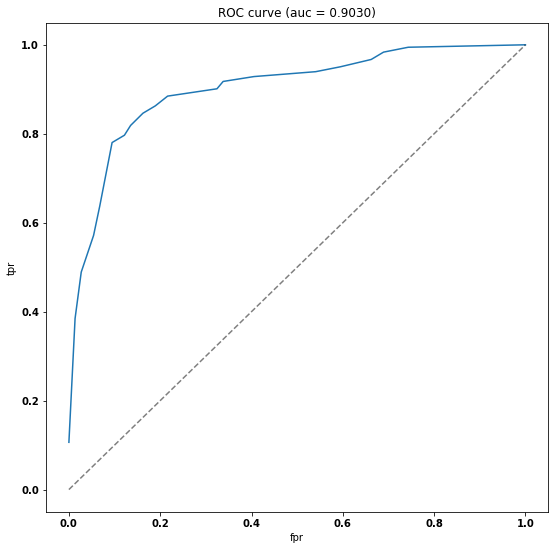

In [86]:
roc_plot(y_test, p01)

## Plot of some trees

In [87]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [88]:
from sklearn.tree import export_graphviz
from sklearn import tree

In [89]:
Xcols = ['ReplacedPipes','CensusHouseholdCount2011','Phosphorus','MeanHouseAge',
 'Region_AYR','Region_DON','Region_FORTH','Region_NITH','Region_TAY','Region_TWEED',
 'UrbanRural_1','UrbanRural_2','UrbanRural_3','UrbanRural_4','UrbanRural_5','UrbanRural_6', 'UrbanRural_7','UrbanRural_8',
 'WOAName_Afton South Region WOA', 'WOAName_Ardeonaig WOA',
 'WOAName_Ardfern WOA','WOAName_Arinagour WOA',
 'WOAName_Auchneel WOA','WOAName_Balmore South Region Tweed WOA',
 'WOAName_Balmore West Region WOA', 'WOAName_Balquidder WOA',
 'WOAName_Black Esk & Winterhope WOA', 'WOAName_Black Esk WOA', 'WOAName_Blairlinnans WOA',
 'WOAName_Blairnamarrow WOA', 'WOAName_Boardhouse WOA', 'WOAName_Bonnycraig (Peebles) WOA',
 "WOAName_Brig o' Turk WOA", 'WOAName_C V & Turret & Balmore WOA',
 'WOAName_Cargen Borehole WOA',
 'WOAName_Carron Valley WOA', 'WOAName_Carsphairn WOA',
 'WOAName_Castle Moffat WOA', 'WOAName_Cladich WOA',
 'WOAName_Clatto WOA', 'WOAName_Colonsay WOA',
 'WOAName_Corrie Membrane WOA', 'WOAName_Crianlarich WOA',
 'WOAName_Daer & Coulter WOA', 'WOAName_Dalmally WOA',
 'WOAName_Eday WOA',
 'WOAName_Eela Water WOA', 'WOAName_Fetlar WOA',
 'WOAName_Forehill WOA', 'WOAName_Foula WOA',
 'WOAName_Gigha WOA', 'WOAName_Glencorse WOA', 'WOAName_Glenfarg WOA',
 'WOAName_Glengap & Ringford WOA',
 'WOAName_Glengap WOA', 'WOAName_Glenlatterach WOA',
 'WOAName_Hopes WOA',
 'WOAName_Inver-Mann-Turriff WOA', 'WOAName_Invercannie WOA', 'WOAName_Kenmore WOA',
 'WOAName_Kettleton WOA', 'WOAName_Killiecrankie WOA',
 'WOAName_Killin WOA',
 'WOAName_Killylour & Terregles WOA',
 'WOAName_Killylour WOA', 'WOAName_Kilmelford WOA',
 'WOAName_Kinloch Rannoch WOA', 'WOAName_Kirbister & Boardhouse WOA',
 'WOAName_Kirkmichael WOA',
 'WOAName_LF & Terregles & Killylour WOA', 'WOAName_Lintrathen WOA',
 'WOAName_Lismore Primary WOA', 'WOAName_Lochearnhead WOA',
 'WOAName_Lochgoilhead WOA',
 'WOAName_Lochinvar WOA', 'WOAName_Marchbank WOA', 'WOAName_Moffat WOA',
 'WOAName_North Hoy WOA', 'WOAName_North Ronaldsay WOA',
 'WOAName_Pateshill WOA', 'WOAName_Penwhirn WOA',
 'WOAName_Perth (Gowans Terrace) WOA', 'WOAName_Rawburn WOA',
 'WOAName_Rosebery (Ed & Lothian) WOA',
 'WOAName_Rousay School WOA', 'WOAName_Sanday WOA', 'WOAName_Sandy Loch WOA', 'WOAName_South Hoy WOA',
 'WOAName_Spey Badentinan WOA', 'WOAName_Strathyre WOA',
 'WOAName_Stronsay WOA', 'WOAName_Taynuilt WOA',
 'WOAName_Tiree WOA', 'WOAName_Tobermory WOA', 'WOAName_Turret East Region WOA',
 'WOAName_Turret West Region WOA', 'WOAName_Tyndrum WOA', 'WOAName_Unst WOA', 'WOAName_Westray WOA','WOAName_Whitehillocks WOA', 'WOAName_Yell WOA']
ycols = ['binary']

In [90]:
clf1= RandomForestClassifier(n_estimators=150, min_samples_split = 2, max_depth=4, max_features='sqrt',min_samples_leaf=1,bootstrap= True,random_state=1)

In [91]:
clf1.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt', n_estimators=150,
                       random_state=1)

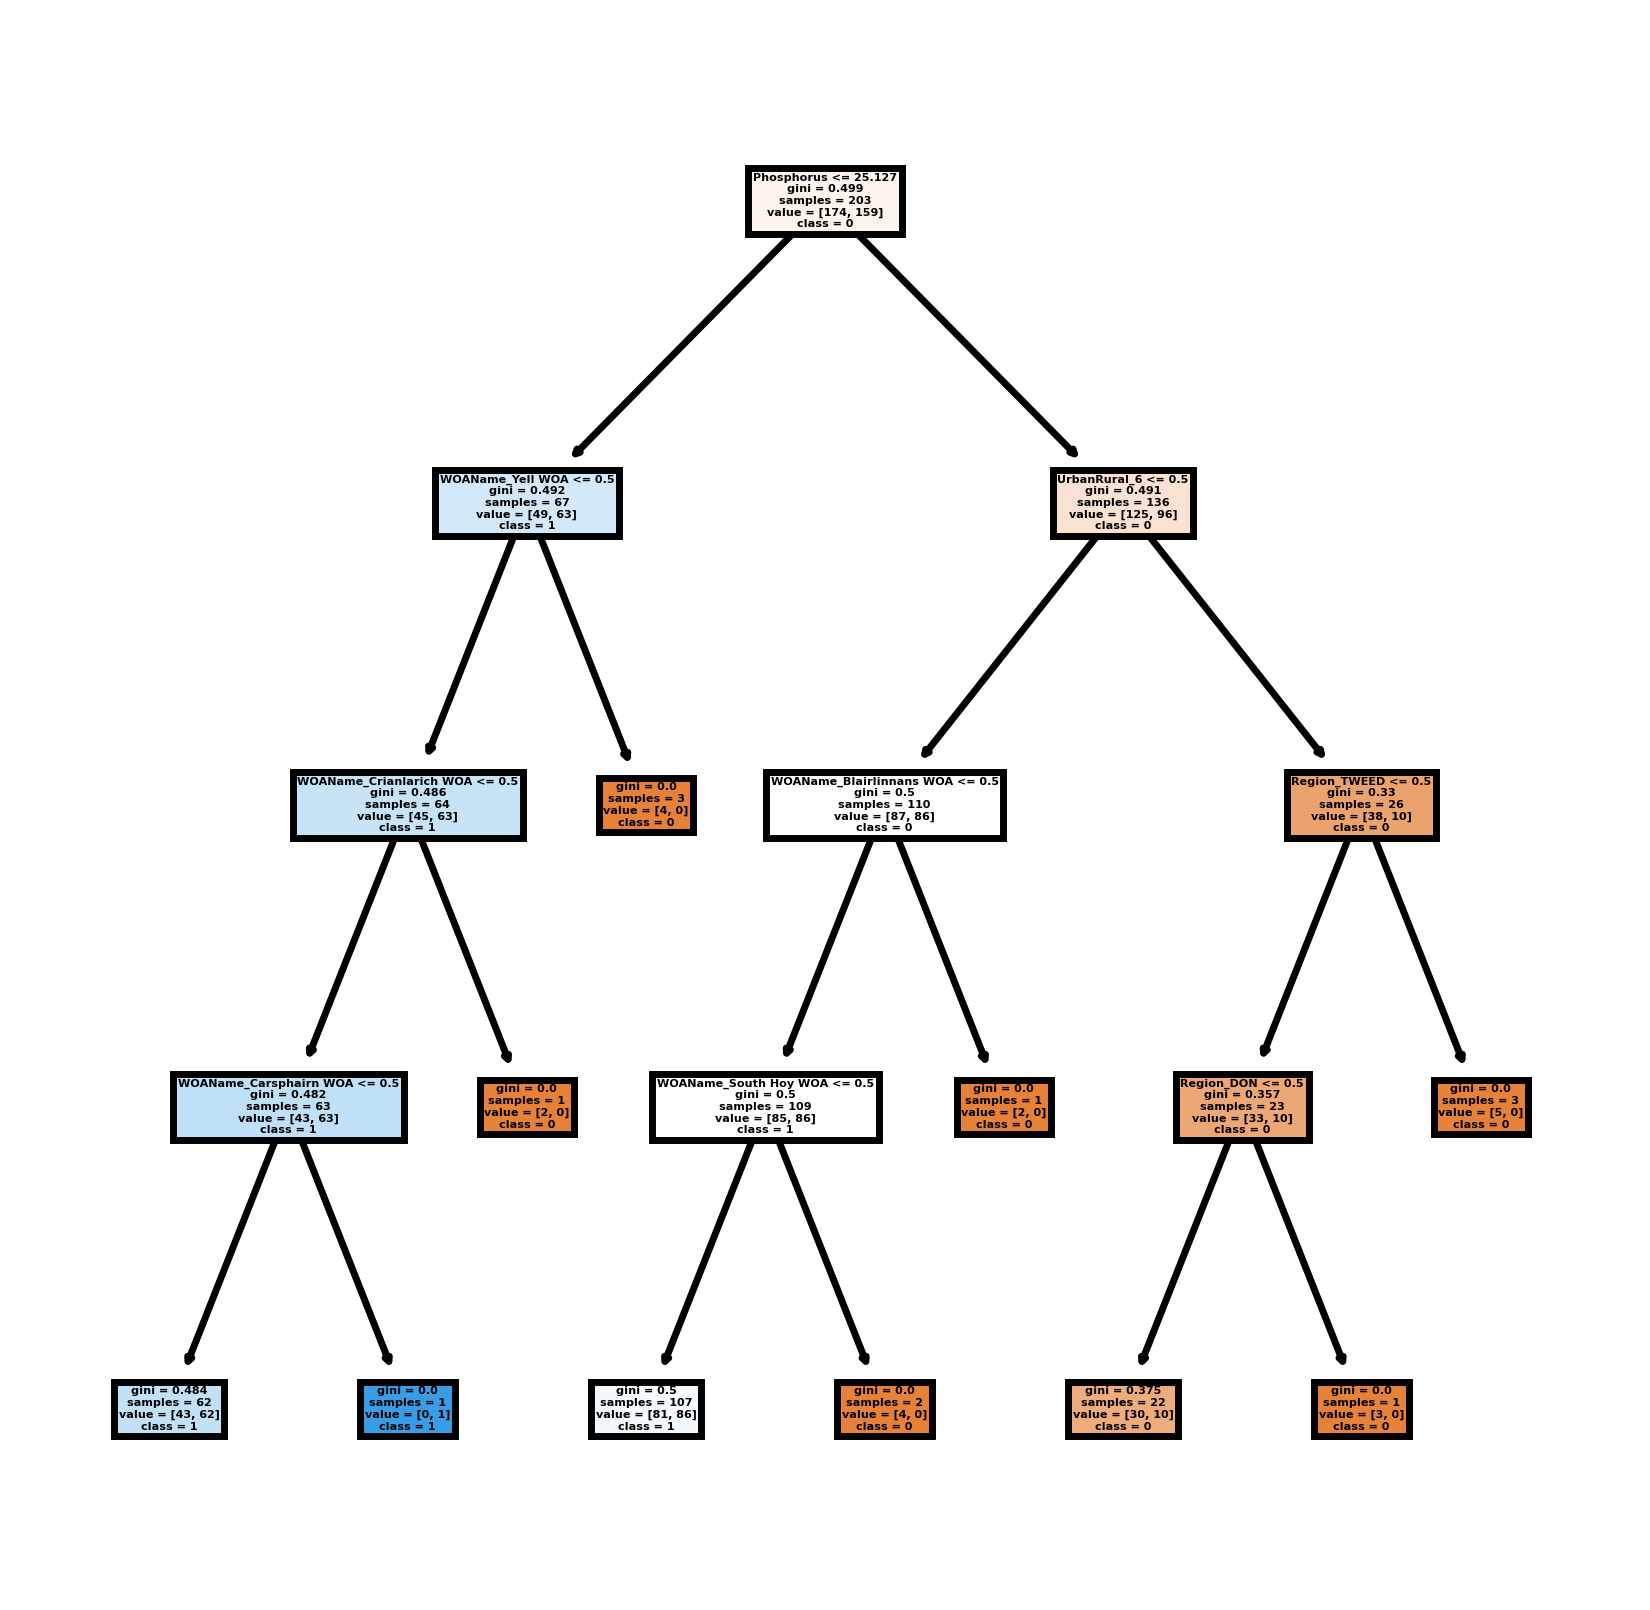

In [92]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(clf1.estimators_[1],
               feature_names = Xcols, 
               class_names=["0","1"],
               filled = True);
fig.savefig('rf_individualtree.png')

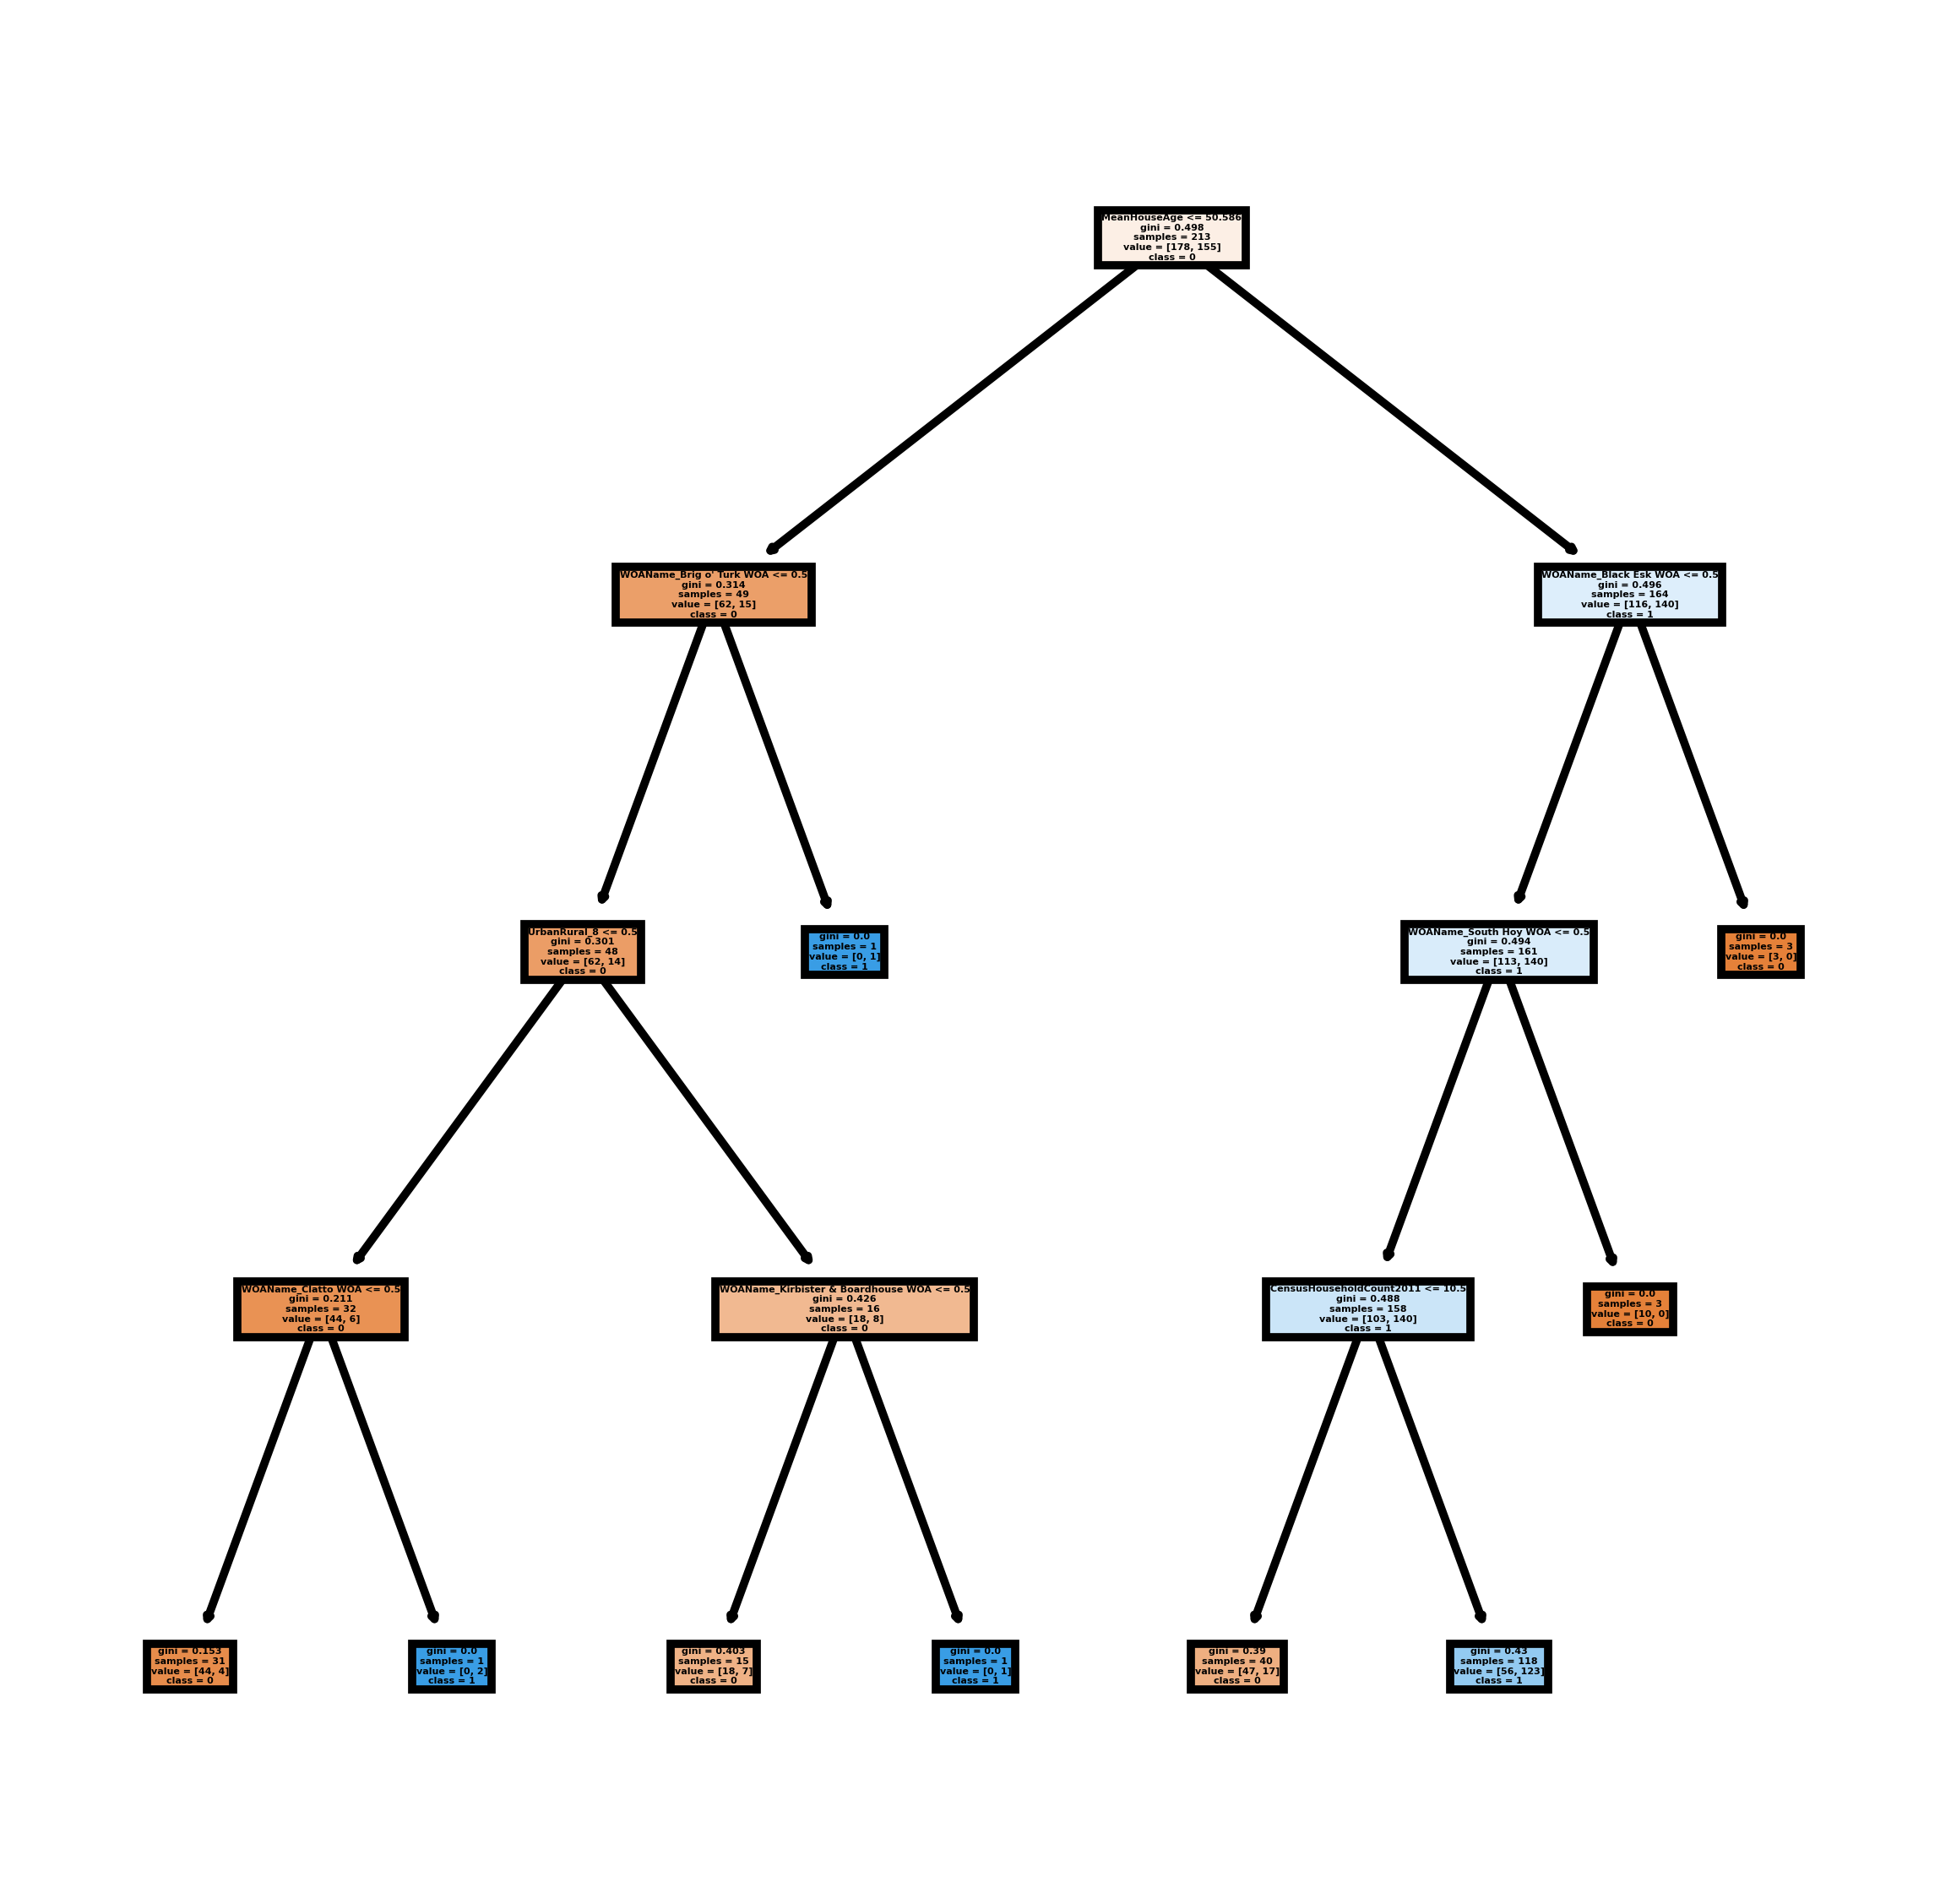

In [93]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=700)
tree.plot_tree(clf1.estimators_[3],
               feature_names = Xcols, 
               class_names=["0","1"],
               filled = True);
fig.savefig('rf_individualtree.png')

## Feature Importance

In [94]:
for name, importance in zip(Xcols, clf.feature_importances_):print(name, "=", importance);

ReplacedPipes = 0.042273708914607216
CensusHouseholdCount2011 = 0.18026963112495042
Phosphorus = 0.08674667803883854
MeanHouseAge = 0.2139800956314783
Region_AYR = 0.0
Region_DON = 0.013422740697805089
Region_FORTH = 0.013594945440453077
Region_NITH = 0.021506369791697157
Region_TAY = 0.010271464624730239
Region_TWEED = 0.013293302094871496
UrbanRural_1 = 0.007247210366584057
UrbanRural_2 = 0.015987556826258763
UrbanRural_3 = 0.011363991839644583
UrbanRural_4 = 0.010306204330724761
UrbanRural_5 = 0.007359279435837423
UrbanRural_6 = 0.024852289333512
UrbanRural_7 = 0.015041505101987304
UrbanRural_8 = 0.024839197883895263
WOAName_Afton South Region WOA = 0.0
WOAName_Ardeonaig WOA = 0.0
WOAName_Ardfern WOA = 0.0023470851445397036
WOAName_Arinagour WOA = 0.0
WOAName_Auchneel WOA = 0.0017182310750928538
WOAName_Balmore South Region Tweed WOA = 0.0014111202449202222
WOAName_Balmore West Region WOA = 0.0
WOAName_Balquidder WOA = 0.00273170184013453
WOAName_Black Esk & Winterhope WOA = 0.00260

In [95]:
features = Xcols
importances = clf.feature_importances_
indices = np.argsort(importances)

In [96]:
indices10 = indices[90:101]
indices10

array([16, 11, 80,  7, 17, 15, 63,  0,  2,  1,  3], dtype=int64)

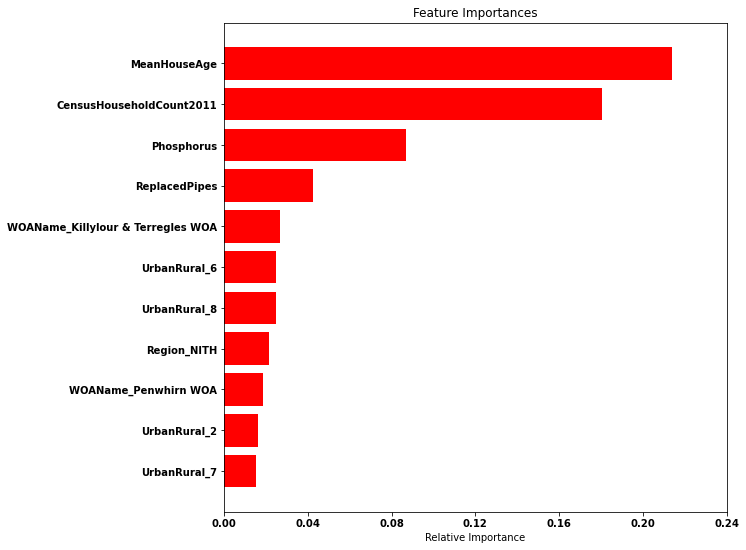

In [97]:
plt.title('Feature Importances')
plt.barh(range(len(indices10)), importances[indices10], color='r', align='center')
plt.yticks(range(len(indices10)), [features[i] for i in indices10])
plt.xlabel('Relative Importance')
plt.xticks([0,0.04,0.08,0.12,0.16,0.2,0.24])
plt.ylim([-1, len(indices10)])
plt.show()